# DATASCI 315, Homework 1: Python Warmup

To submit, please submit a pdf of the page of your notebook (Ctrl + p on the page, save as pdf, and submit that pdf).

In [3]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
import copy

# Part 1: Using Python to Solve Problems
The first two questions in part 1 come from [projecteuler.net](https://projecteuler.net/archives). Project Euler is a site that has an archive of interesting mathematical/computational problems to try to solve.

The last problem was modeled after a problem found on leetcode.com. Leetcode is a great resource to get problems that allow you to hone your programming skills.

## (10 pts) Question 1: Largest Palindrome Product
A palindromic number reads the same both ways. The largest palindrome made from the product of two
2-digit numbers is 9009= 91 x 99.

Find the largest palindrome made from the product of two
3-digit numbers.

In [9]:
def three_digit_palindrome():
    max_palindrome = 0
    for i in range(100, 1000):
        for j in range(i, 1000):
            product = i * j
            if str(product) == str(product)[::-1]:
                if product > max_palindrome:
                    max_palindrome = product
    return max_palindrome
            
    pass

In [11]:
#test your code below
three_digit_palindrome()

906609

## (10 pts) Question 2: n-Digit Fibonacci Number
<p>The Fibonacci sequence is defined by the recurrence relation:</p>
<blockquote>$F_n = F_{n - 1} + F_{n - 2}$, where $F_1 = 1$ and $F_2 = 1$.</blockquote>
<p>Hence the first $12$ terms will be:</p>
\begin{align}
F_1 &= 1\\
F_2 &= 1\\
F_3 &= 2\\
F_4 &= 3\\
F_5 &= 5\\
F_6 &= 8\\
F_7 &= 13\\
F_8 &= 21\\
F_9 &= 34\\
F_{10} &= 55\\
F_{11} &= 89\\
F_{12} &= 144
\end{align}
<p>The $12$th term, $F_{12}$, is the first term to contain three digits.</p>
<p>Write a function that takes an input $n$ and returns the index of the first term in the Fibonacci sequence to contain $n$ digits?</p>

(Hint: store the values of the previous two Fibonacci numbers)

In [16]:
def nfib(n):
    if n <= 1:
        return 1
    F1, F2 = 1, 1
    index = 2

    while True:
        F_next = F1 + F2
        index += 1
        if len(str(F_next)) >= n:
            return index
        F1, F2 = F2, F_next
    pass



In [18]:
#test your code below
print(nfib(3))
print(nfib(1000))

12
4782


## (20 pts) Question 3: Stackable Arrays

You are given an array of unique integers. You have to create a stack one element at a time in the following fashion- At each step you can take either the leftmost or rightmost element of the array and place it in your stack.
You can continue stacking only if the next available elements are smaller than the ones previously placed.

Write a program to decide if a given array of numbers forms a stackable array or not.

Eg: [7, 5, 3, 6, 10] is stackable, but [2,5,6,3] is not.


In [21]:
def is_stackable(array):
    left, right = 0, len(array) - 1
    current_max = float('inf')
    while left <= right:
        if array[left] >= array[right]:
            chosen = array[left]
            left += 1
        else:
            chosen = array[right]
            right -= 1
        if chosen > current_max:
            return False
        current_max = chosen
    return True
    pass

In [23]:
#test your code below
print(is_stackable([7,5,3,6,10]))
print(is_stackable([2,5,6,3]))

True
False


# Part 2: Image Manipulation
Digital images are often represented by a grid of pixels where each pixel has 3 values: a red value, a green value, and a blue value. You can read more about how digital images work [here](https://introcomputing.org/image-introduction.html). With this, we can use 3D arrays to store pictures and manipulate them in various ways. Below is a picture of a coffee cup taken from scikit-learn's image library.

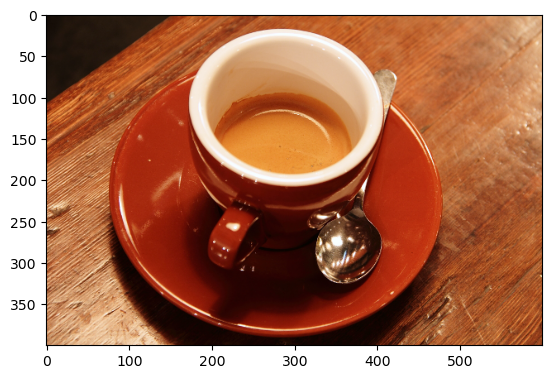

In [25]:
plt.imshow(skimage.data.coffee())
plt.show()

And this is how the image is stored in the scikit-learn's image library:

In [27]:
skimage.data.coffee()

array([[[ 21,  13,   8],
        [ 21,  13,   9],
        [ 20,  11,   8],
        ...,
        [228, 182, 138],
        [231, 185, 142],
        [228, 184, 140]],

       [[ 21,  13,   7],
        [ 21,  13,   9],
        [ 20,  14,   7],
        ...,
        [228, 182, 136],
        [231, 185, 139],
        [229, 183, 137]],

       [[ 21,  14,   7],
        [ 23,  13,  10],
        [ 20,  14,   9],
        ...,
        [228, 182, 136],
        [228, 184, 137],
        [229, 185, 138]],

       ...,

       [[189, 124,  77],
        [214, 155, 109],
        [197, 141, 100],
        ...,
        [165,  86,  37],
        [161,  82,  41],
        [143,  67,  29]],

       [[207, 148, 102],
        [201, 142,  99],
        [196, 140,  97],
        ...,
        [154,  74,  37],
        [147,  66,  33],
        [145,  65,  31]],

       [[197, 141, 100],
        [195, 137,  99],
        [193, 138,  98],
        ...,
        [158,  73,  38],
        [144,  64,  30],
        [143,  60,  29]]

The inner-most arrays correspond to actual pixel values (e.g. $[143,60,29]$ is the r,g,b values for the bottom right most pixel). Then, these are stored in another array that represents the row (e.g. $[[197,141,100],...[143,60,29]]$ are the pixels that correspond to the last row). Finally, these rows are stacked to create the picture.

The rest of the homework will be manipulating this image in various ways. The following function is given to you to use to show the picture

In [38]:
def show_image(image):
    if isinstance(image, np.ndarray):
        plt.imshow(image)
        plt.show()

## (10 pts) Question 4: Blue-scale
Set the picture of a coffee mug so that for each pixel, the red and green values are set to 0, but the blue values do not change.

In [40]:
def blue_scale(picture):
    picture[:,:,0] = 0
    picture[:,:,1] = 1
    return picture
    pass

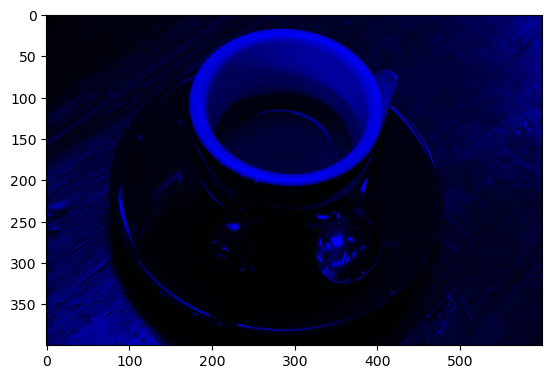

In [42]:
#test your code below
coffee = copy.deepcopy(skimage.data.coffee())
show_image(blue_scale(coffee))

## (10 pts) Question 5: Columns of RGB
For each column in the picture, change it to only have one of the RGB values be non-zero for each pixel.

Specifically, make the first column only have the blue values, the second column only have red values, the third column only have green values, the fourth back to only blue and so on.

In [48]:
def columns_rgb(picture):
    num_rows, num_cols, num_channels = picture.shape
    for col in range(num_cols):
        if col % 3 == 0:
            picture[:, col, 0] = 0
            picture[:, col, 1] = 0
        elif col % 3 == 1:
            picture[:, col, 1] = 0 
            picture[:, col, 2] = 0
        elif col % 3 == 2:
            picture[:, col, 0] = 0  
            picture[:, col, 2] = 0  
    return picture
    pass

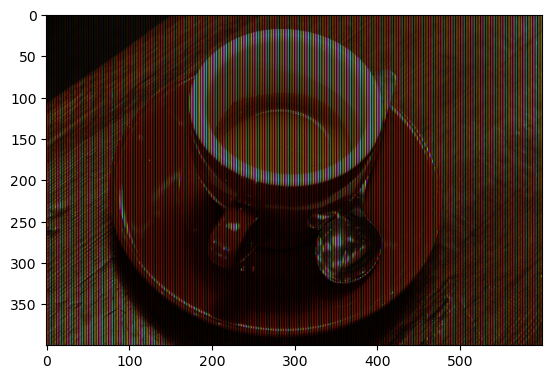

In [50]:
#test your code below
coffee = copy.deepcopy(skimage.data.coffee())
show_image(columns_rgb(coffee))

## (10 pts) Question 6: Flip Vertical
Now, flip the original image of the coffee mug upside down (top left becomes bottom left and top right becomes bottom right).

In [52]:
def flip_vert(picture):
    flipped_picture = picture[::-1, :, :]
    return flipped_picture
    pass

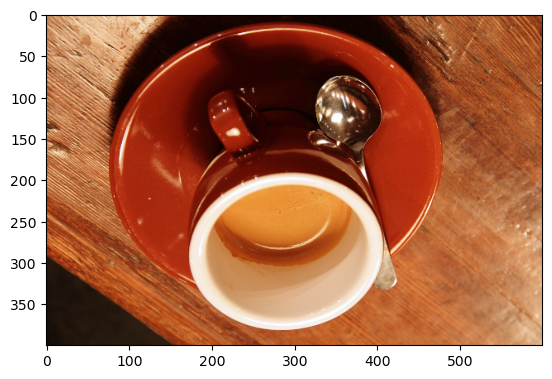

In [54]:
#test your code below
coffee = copy.deepcopy(skimage.data.coffee())
show_image(flip_vert(coffee))

## (10 pts) Question 7: Cropping
Crop the picture of the coffee mug to the rectangle defined by pixels 100 to 200 (101 total pixels) on the y-axis and pixels 100 to 400 on the x-axis.

In [56]:
def crop_pic(picture):
    cropped_pic = picture[100:201, 100:401, :]
    return cropped_pic
    pass

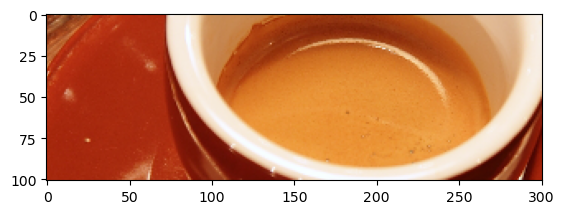

In [58]:
#test your code below
coffee = copy.deepcopy(skimage.data.coffee())
show_image(crop_pic(coffee))

## (20 pts) Question 8: Blurring Images
One way to blur images is to replace the rgb value of each pixel by the average rgb value of the neighbouring pixels.

Fill in the missing code below so that the rgb value of each pixel is replaced by the average of the neighbouring 11 x 11 pixels (including the pixel itself).

Hint: The region of interest (roi) for each pixel, over which the average is taken, should be 5 rows above and below the pixel and 5 columns to the left and right of the pixel. Please modify the code for the edge cases.

In [73]:
def average_blur_rgb(image):
    height, width, pixels = image.shape
    blurred_image = np.zeros_like(image, dtype=np.float32)

    for i in range(height):
        for j in range(width):
            # Define the region of interest (ROI) for the current pixel
            start_row = max(0, i - 5)
            end_row = min(height, i + 6)
            start_col = max(0, j - 5)
            end_col = min(width, j + 6)
            roi = image[start_row:end_row, start_col:end_col]

            # Calculate the average value
            avg_value = np.mean(roi, axis=(0, 1))
            blurred_image[i, j] = avg_value
            pass

    return blurred_image.astype(np.uint8)

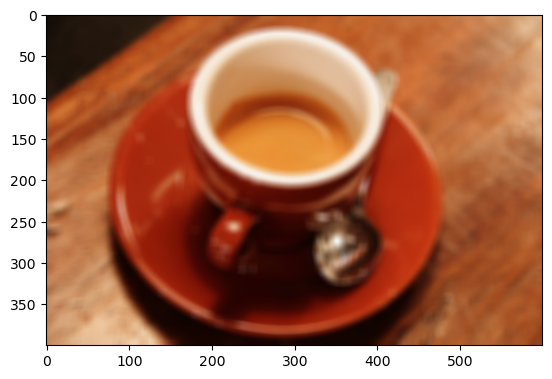

In [75]:
#test your code below
coffee = copy.deepcopy(skimage.data.coffee())
show_image(average_blur_rgb(coffee))